In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.ioff();

import os

import scipy 
from scipy.stats import norm

import math


import librosa
import librosa.display

from IPython.display import Audio

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import scale, LabelEncoder, StandardScaler, minmax_scale

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys

In [2]:
meta_data = pd.read_csv('Source/UrbanSound8K/metadata/UrbanSound8K.csv')

In [4]:
meta_data.head(40)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [135]:
classes = list(meta_data['class'].unique())

In [17]:
meta_data[(meta_data['class'] == 'dog_bark') & (meta_data['salience'] == 1)].sample(30)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
14,100652-3-0-0.wav,100652,0.000000,4.000000,1,2,3,dog_bark
15,100652-3-0-1.wav,100652,0.500000,4.500000,1,2,3,dog_bark
16,100652-3-0-2.wav,100652,1.000000,5.000000,1,2,3,dog_bark
17,100652-3-0-3.wav,100652,1.500000,5.500000,1,2,3,dog_bark
...,...,...,...,...,...,...,...,...
8594,97193-3-0-4.wav,97193,2.000000,6.000000,1,2,3,dog_bark
8595,97193-3-0-6.wav,97193,3.000000,7.000000,1,2,3,dog_bark
8611,97392-3-0-0.wav,97392,0.000000,2.773946,1,6,3,dog_bark
8618,97756-3-0-0.wav,97756,0.141727,1.290466,1,10,3,dog_bark


## SOUNDS USED IN PRESENTATION

In [18]:
meta_data[meta_data['slice_file_name'] == '100652-3-0-3.wav']

,slice_file_name,fsID,start,end,salience,fold,classID,class
17,100652-3-0-3.wav,100652,1.5,5.5,1,2,3,dog_bark


(88200,) : [-0.01510029 -0.02727826 -0.01873276 ... -0.08452077 -0.05192945
  0.01705787]


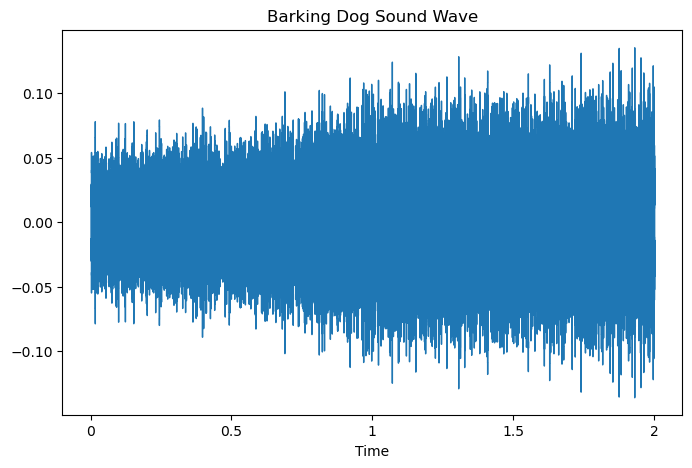

In [51]:
y, sr = librosa.load('Source/UrbanSound8K/audio/fold3/177742-0-0-178.wav')
fig, ax = plt.subplots(figsize=(8,5))
librosa.display.waveshow(y[:(y.size//2)], sr=sr, ax=ax)
ax.set(title='Barking Dog Sound Wave')
ax.label_outer()
print(y.shape,':',y)
plt.show()

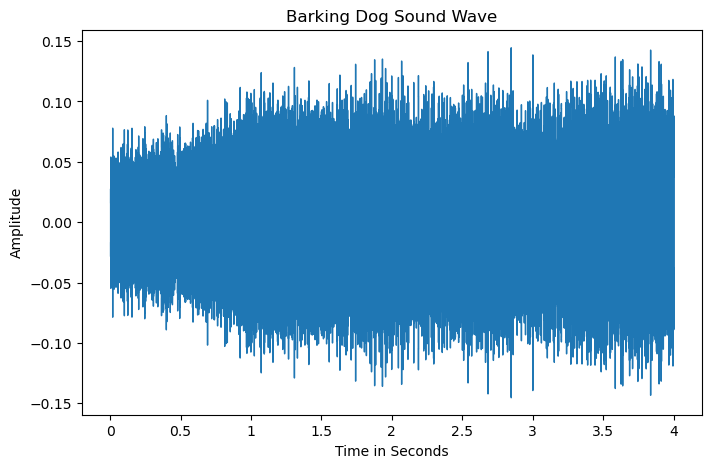

In [64]:
y, sr = librosa.load('Source/UrbanSound8K/audio/fold3/177742-0-0-178.wav')
fig, ax = plt.subplots(figsize=(8,5))
librosa.display.waveshow(y, sr=sr, ax=ax)
ax.set(title='Barking Dog Sound Wave')
plt.xlabel('Time in Seconds')
plt.ylabel('Amplitude')
ax.label_outer()
plt.show()

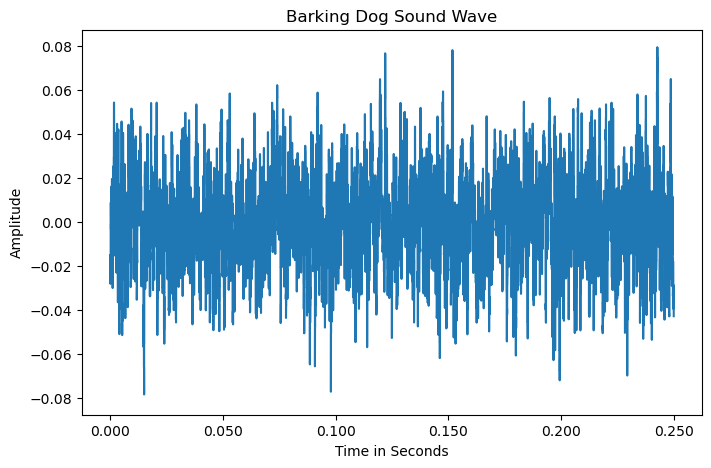

In [63]:
y, sr = librosa.load('Source/UrbanSound8K/audio/fold3/177742-0-0-178.wav')
fig, ax = plt.subplots(figsize=(8,5))
librosa.display.waveshow(y[:(y.size//16)], sr=sr, ax=ax)
ax.set(title='Barking Dog Sound Wave')
plt.xlabel('Time in Seconds')
plt.ylabel('Amplitude')
ax.label_outer()
plt.show()

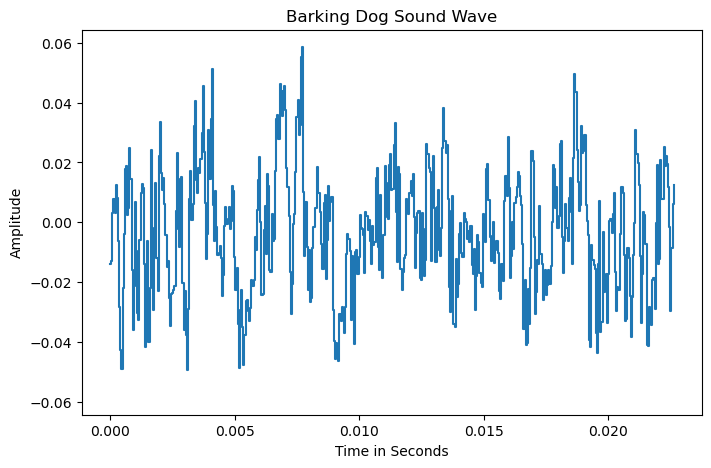

In [68]:
y, sr = librosa.load('Source/UrbanSound8K/audio/fold3/177742-0-0-178.wav')
fig, ax = plt.subplots(figsize=(8,5))
librosa.display.waveshow(y[1000:1500], sr=sr, ax=ax)
ax.set(title='Barking Dog Sound Wave')
plt.xlabel('Time in Seconds')
plt.ylabel('Amplitude')
ax.label_outer()
plt.show()

In [69]:
D = librosa.stft(y)

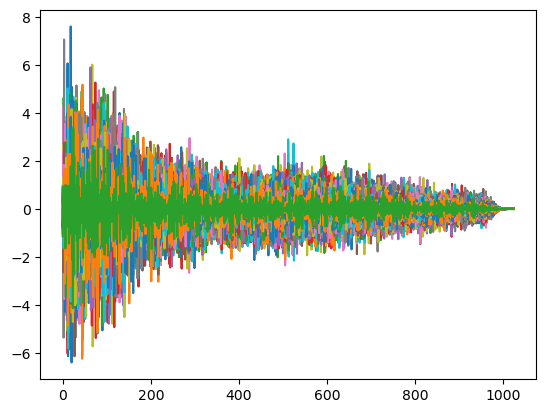

In [72]:
plt.plot(D)
plt.show()

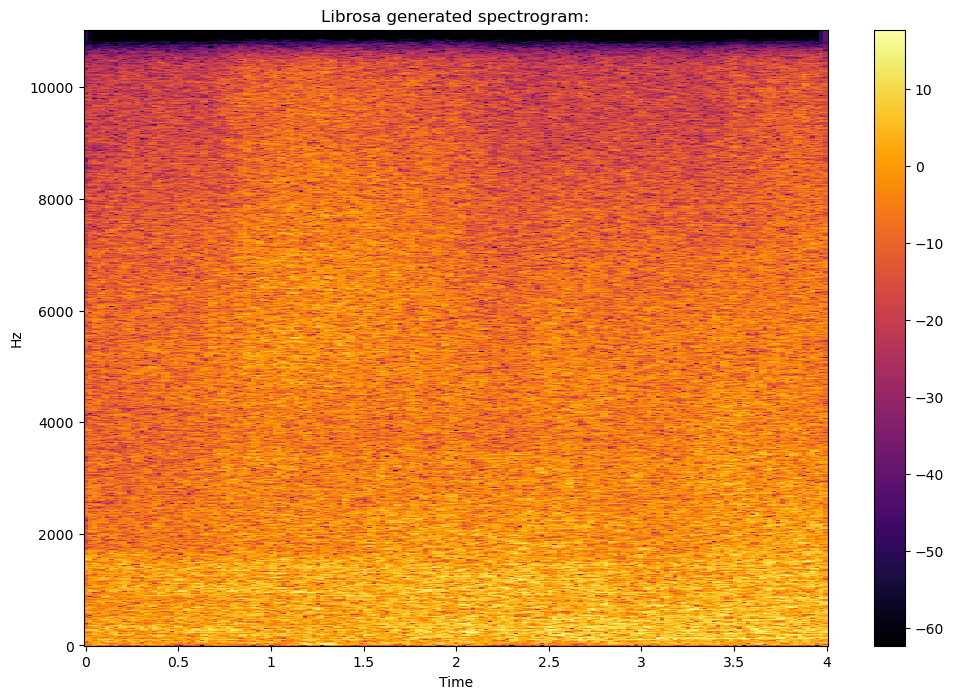

In [77]:
#air_conditioner salience 1

y, sr = librosa.load('Source/UrbanSound8K/audio/fold3/177742-0-0-178.wav')

fig, ax = plt.subplots(figsize = (12,8))
x_stft = librosa.stft(y)
ampl = librosa.amplitude_to_db(abs(x_stft))
img = librosa.display.specshow(ampl, ax=ax,x_axis='time' , y_axis='linear', cmap = 'inferno')

ax.set_title('Librosa generated spectrogram:')
plt.colorbar(img)

plt.show()

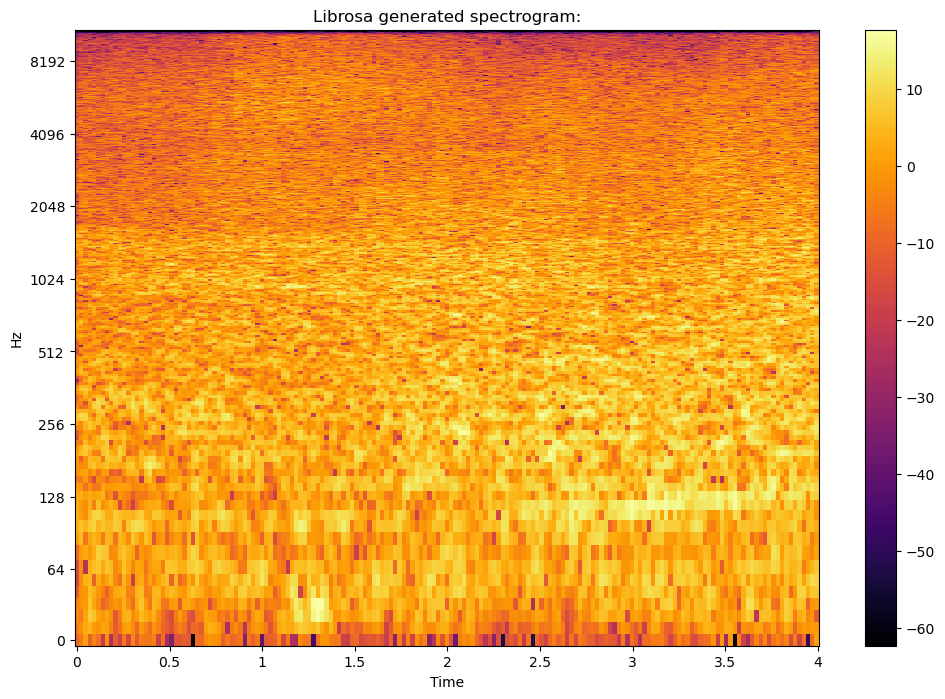

In [78]:
#air_conditioner salience 1

y, sr = librosa.load('Source/UrbanSound8K/audio/fold3/177742-0-0-178.wav')

fig, ax = plt.subplots(figsize = (12,8))
x_stft = librosa.stft(y)
ampl = librosa.amplitude_to_db(abs(x_stft))
img = librosa.display.specshow(ampl, ax=ax,x_axis='time' , y_axis='log', cmap = 'inferno')

ax.set_title('Librosa generated spectrogram:')
plt.colorbar(img)

plt.show()

In [19]:
y, sr = librosa.load('Source/UrbanSound8K/audio/fold3/177742-0-0-178.wav')


In [26]:
y.size

88200

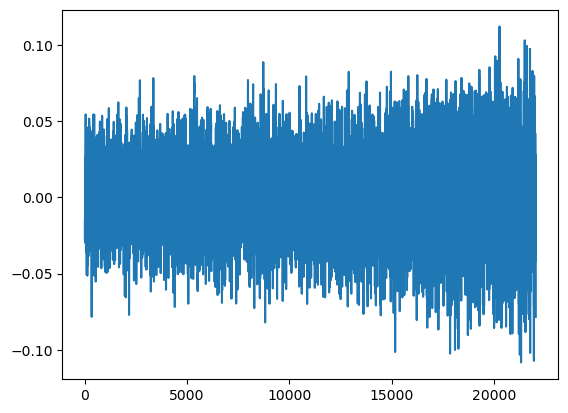

In [32]:
plt.plot(y[:(88200//4)])
plt.show()

In [46]:
y.size

88200

(88200,) : [-0.01510029 -0.02727826 -0.01873276 ... -0.08452077 -0.05192945
  0.01705787]


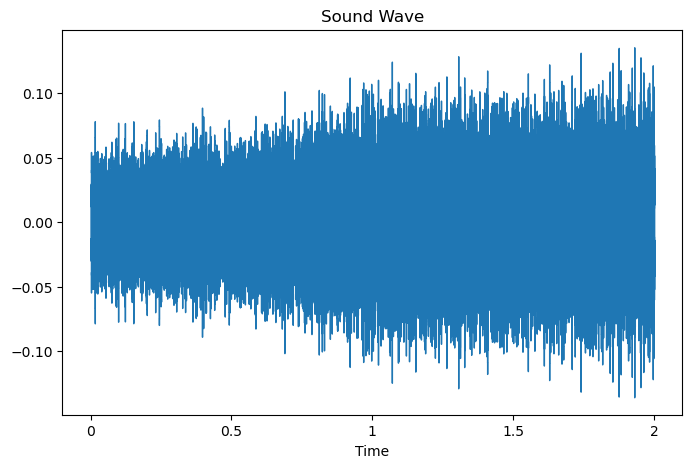

In [48]:
fig, ax = plt.subplots(figsize=(8,5))
librosa.display.waveshow(y[:(y.size//2)], sr=sr, ax=ax)
ax.set(title='Sound Wave')
ax.label_outer()
print(y.shape,':',y)
plt.show()

In [38]:
import wave
import numpy as np
import matplotlib.pyplot as plt

signal_wave = wave.open('Source/UrbanSound8K/audio/fold3/177742-0-0-178.wav', 'r')
sample_rate = 22050
sig = np.frombuffer(signal_wave.readframes(sample_rate), dtype=np.int16)


Error: unknown format: 65534

In [8]:
meta_data[meta_data['slice_file_name'] == '95549-3-0-14.wav']

,slice_file_name,fsID,start,end,salience,fold,classID,class
8549,95549-3-0-14.wav,95549,18.181689,22.181689,2,8,3,dog_bark


In [12]:
meta_data[meta_data['slice_file_name'] == '128465-1-0-1.wav']

,slice_file_name,fsID,start,end,salience,fold,classID,class
1204,128465-1-0-1.wav,128465,7.677949,11.677949,2,6,1,car_horn


In [16]:
meta_data[meta_data['slice_file_name'] == '207211-2-0-11.wav']

,slice_file_name,fsID,start,end,salience,fold,classID,class
5486,207211-2-0-11.wav,207211,5.5,9.5,1,9,2,children_playing


In [80]:
meta_data[meta_data['slice_file_name'] == '19026-1-0-0.wav']

,slice_file_name,fsID,start,end,salience,fold,classID,class
4804,19026-1-0-0.wav,19026,0.012822,1.050575,1,1,1,car_horn


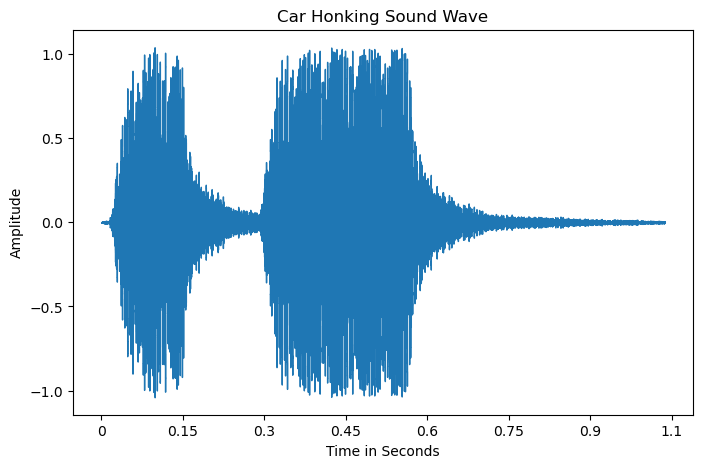

In [83]:
y, sr = librosa.load('Source/UrbanSound8K/audio/fold1/19026-1-0-0.wav')
fig, ax = plt.subplots(figsize=(8,5))
librosa.display.waveshow(y, sr=sr, ax=ax)
ax.set(title='Car Honking Sound Wave')
plt.xlabel('Time in Seconds')
plt.ylabel('Amplitude')
ax.label_outer()
plt.show()

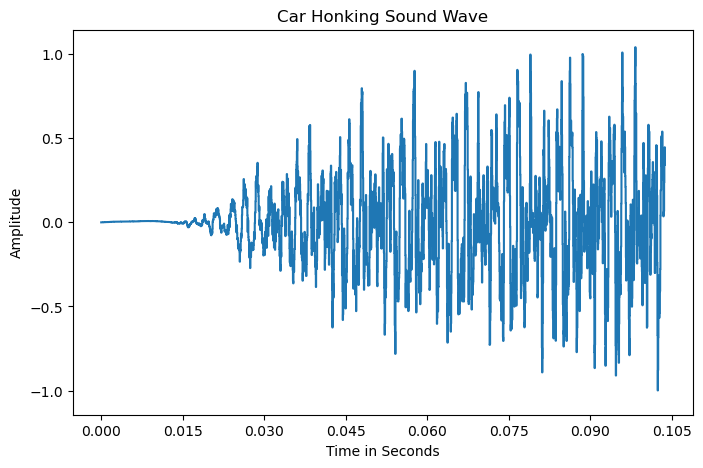

In [91]:
y, sr = librosa.load('Source/UrbanSound8K/audio/fold1/19026-1-0-0.wav')
fig, ax = plt.subplots(figsize=(8,5))
librosa.display.waveshow(y[:(y.size//10)], sr=sr, ax=ax)
ax.set(title='Car Honking Sound Wave')
plt.xlabel('Time in Seconds')
plt.ylabel('Amplitude')
ax.label_outer()
plt.show()

In [79]:
meta_data[(meta_data['class'] == 'car_horn') & (meta_data['salience'] == 1)].sample(30)

,slice_file_name,fsID,start,end,salience,fold,classID,class
6725,54086-1-0-0.wav,54086,0.000000,1.161940,1,10,1,car_horn
6737,54187-1-0-1.wav,54187,0.689361,4.689361,1,9,1,car_horn
4154,179862-1-0-0.wav,179862,0.324883,0.705780,1,4,1,car_horn
5956,28808-1-0-4.wav,28808,2.000000,6.000000,1,10,1,car_horn
3054,164627-1-0-0.wav,164627,0.306819,1.804998,1,7,1,car_horn
7456,71439-1-1-0.wav,71439,3.699306,3.906744,1,5,1,car_horn
5743,24074-1-0-2.wav,24074,14.060993,18.060993,1,1,1,car_horn
4159,179866-1-1-0.wav,179866,0.913249,1.628663,1,2,1,car_horn
5954,28808-1-0-2.wav,28808,1.000000,5.000000,1,10,1,car_horn
6739,54187-1-0-3.wav,54187,1.689361,5.689361,1,9,1,car_horn


In [15]:
meta_data[(meta_data['class'] == 'children_playing') & (meta_data['salience'] == 1)].sample(30)

,slice_file_name,fsID,start,end,salience,fold,classID,class
5033,196070-2-0-0.wav,196070,0.000000,4.000000,1,7,2,children_playing
2620,159735-2-0-99.wav,159735,49.500000,53.500000,1,9,2,children_playing
4115,178826-2-0-12.wav,178826,6.000000,10.000000,1,10,2,children_playing
61,101382-2-0-33.wav,101382,16.500000,20.500000,1,10,2,children_playing
5486,207211-2-0-11.wav,207211,5.500000,9.500000,1,9,2,children_playing
4865,192269-2-0-18.wav,192269,9.000000,13.000000,1,2,2,children_playing
1512,13579-2-0-62.wav,13579,32.619075,36.619075,1,9,2,children_playing
1636,142003-2-0-8.wav,142003,4.000000,8.000000,1,8,2,children_playing
3761,176714-2-0-77.wav,176714,38.500000,42.500000,1,1,2,children_playing
3362,169044-2-0-25.wav,169044,12.500000,16.500000,1,3,2,children_playing


In [14]:
meta_data[(meta_data['class'] == 'children_playing') & (meta_data['salience'] == 2)].sample(30)

,slice_file_name,fsID,start,end,salience,fold,classID,class
3633,17480-2-0-30.wav,17480,15.000000,19.000000,2,4,2,children_playing
4891,193697-2-0-5.wav,193697,2.500000,6.500000,2,6,2,children_playing
4907,193699-2-0-54.wav,193699,27.000000,31.000000,2,8,2,children_playing
5510,207216-2-0-119.wav,207216,64.054455,68.054455,2,7,2,children_playing
7423,71173-2-0-103.wav,71173,51.500000,55.500000,2,5,2,children_playing
2284,155263-2-0-43.wav,155263,21.500000,25.500000,2,3,2,children_playing
6066,31150-2-0-17.wav,31150,8.500000,12.500000,2,5,2,children_playing
2283,155263-2-0-34.wav,155263,17.000000,21.000000,2,3,2,children_playing
8273,84359-2-0-0.wav,84359,0.000000,4.000000,2,2,2,children_playing
6779,54914-2-0-26.wav,54914,13.000000,17.000000,2,8,2,children_playing


In [11]:
meta_data[(meta_data['class'] == 'car_horn') & (meta_data['salience'] == 2)].head(30)

,slice_file_name,fsID,start,end,salience,fold,classID,class
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn
10,100648-1-1-0.wav,100648,8.998279,10.052132,2,10,1,car_horn
11,100648-1-2-0.wav,100648,16.699509,17.104837,2,10,1,car_horn
12,100648-1-3-0.wav,100648,17.631764,19.253075,2,10,1,car_horn
13,100648-1-4-0.wav,100648,25.332994,27.197502,2,10,1,car_horn
497,107090-1-0-0.wav,107090,25.500254,26.099176,2,8,1,car_horn
498,107090-1-1-0.wav,107090,29.715744,30.545020,2,8,1,car_horn
868,117536-1-0-0.wav,117536,31.064967,31.640588,2,4,1,car_horn
919,118496-1-0-0.wav,118496,1.394779,1.649762,2,3,1,car_horn
920,118496-1-1-0.wav,118496,1.963587,2.155369,2,3,1,car_horn


In [ ]:
for i in classes:
    

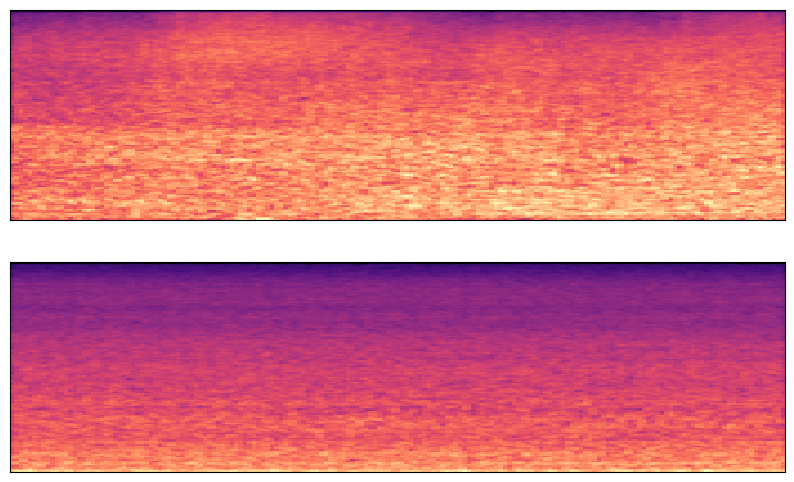

In [3]:
y, sr = librosa.load('Source/UrbanSound8K/audio/fold3/177742-0-0-178.wav')

y = np.resize(y, 88200)

fig, ax = plt.subplots(figsize=(10,6), nrows = 2)

S = librosa.feature.melspectrogram(y=y, sr=sr)
img = librosa.display.specshow(librosa.power_to_db(S, ref=np.max), ax = ax[0])

y, sr = librosa.load('Source/UrbanSound8K/audio/fold9/189988-0-0-5.wav')

y = np.resize(y, 88200)


S = librosa.feature.melspectrogram(y=y, sr=sr)
img = librosa.display.specshow(librosa.power_to_db(S, ref=np.max), ax = ax[1])
plt.show()

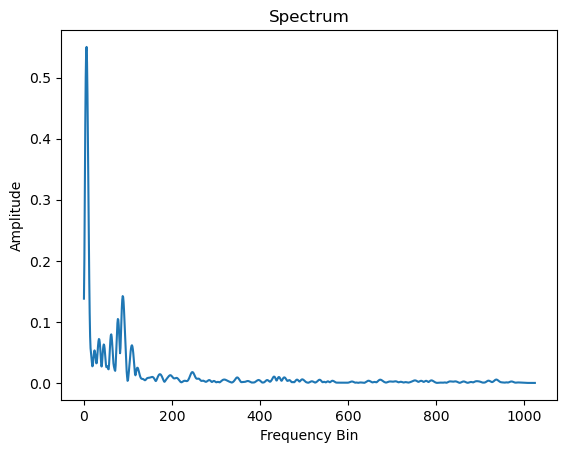

In [127]:
import numpy as np
n_fft = 88200
ft = np.abs(librosa.stft(y[:n_fft], hop_length = n_fft+1))
plt.plot(ft);
plt.title('Spectrum');
plt.xlabel('Frequency Bin');
plt.ylabel('Amplitude');
plt.show()

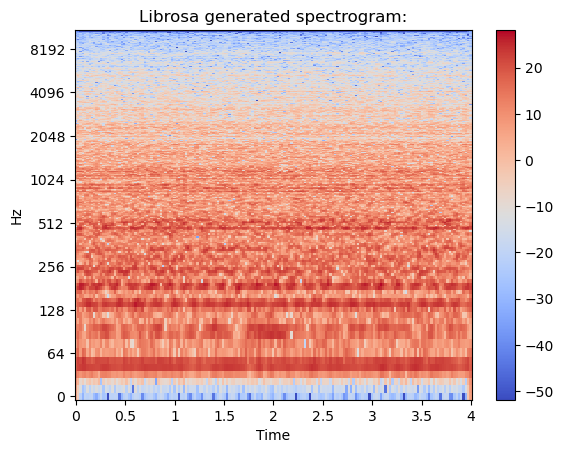

In [8]:
y, sr = librosa.load('Source/UrbanSound8K/audio/fold2/74507-0-0-28.wav')

fig, ax = plt.subplots()
x_stft = librosa.stft(y)
ampl = librosa.amplitude_to_db(abs(x_stft))
img = librosa.display.specshow(ampl, ax=ax,x_axis='time' , y_axis='log')

ax.set_title('Librosa generated spectrogram:')
plt.colorbar(img)

plt.show()

In [9]:
y, sr = librosa.load('Source/UrbanSound8K/audio/fold2/74507-0-0-28.wav')


In [46]:
audio_data = 'Source/UrbanSound8K/audio/fold2/74507-0-0-28.wav'
y , sr = librosa.load(audio_data, duration=10)

Audio(y, rate=sr)

(88200,) : [ 0.12389302  0.17650838  0.12079119 ... -0.00860923 -0.01769568
 -0.02018623]


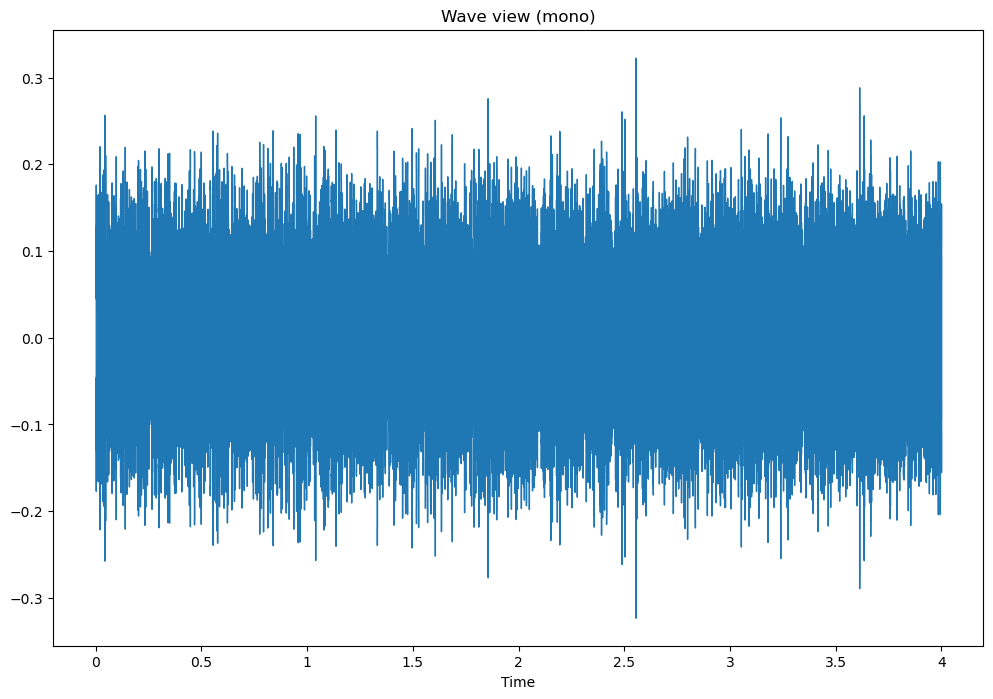

In [53]:
fig, ax = plt.subplots(figsize=(12,8))
librosa.display.waveshow(y, sr=sr, ax=ax)
ax.set(title='Wave view (mono)')
ax.label_outer()
print(y.shape,':',y)
plt.show()

Number of crossing in first 400 frames: 39


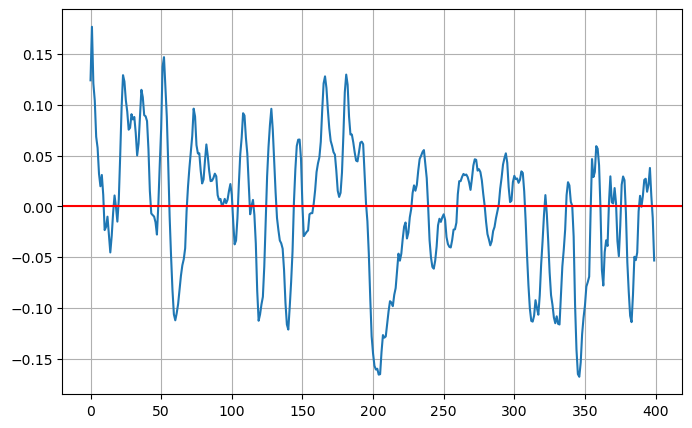

In [59]:
fig, ax = plt.subplots(figsize=(8,5))
n0=0
n1=400
zero_crossings = librosa.zero_crossings(y=y[n0:n1], pad=False)

zero_crossings.shape
ax.plot(y[n0:n1])
ax.axhline(0, color='r')
ax.grid()
print(f'Number of crossing in first {n1} frames:',sum(zero_crossings))
plt.show()

In [65]:
spectral_rolloff

array([3746.77734375, 3488.37890625, 3542.21191406, 3456.07910156,
       3692.94433594, 3757.54394531, 3219.21386719, 3779.07714844,
       3520.67871094, 3682.17773438, 3574.51171875, 3617.578125  ,
       3456.07910156, 3509.91210938, 3768.31054688, 3671.41113281,
       3951.34277344, 3919.04296875, 4048.2421875 , 3951.34277344,
       3725.24414062, 3617.578125  , 3628.34472656, 3596.04492188,
       3617.578125  , 3348.41308594, 3682.17773438, 3617.578125  ,
       4048.2421875 , 4005.17578125, 3456.07910156, 3692.94433594,
       3402.24609375, 3369.94628906, 3240.74707031, 3316.11328125,
       3402.24609375, 3520.67871094, 3671.41113281, 3714.47753906,
       3811.37695312, 3456.07910156, 3305.34667969, 3682.17773438,
       3628.34472656, 3789.84375   , 3413.01269531, 3262.28027344,
       3434.54589844, 3466.84570312, 3736.01074219, 3520.67871094,
       3617.578125  , 3628.34472656, 3886.74316406, 3886.74316406,
       3563.74511719, 3413.01269531, 3434.54589844, 4005.17578

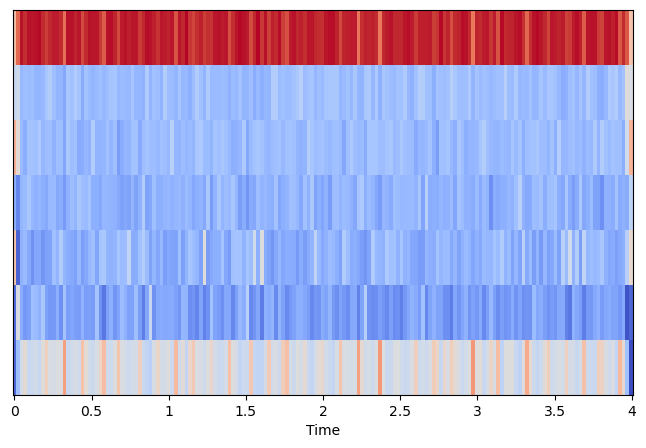

In [70]:
fig, ax = plt.subplots(figsize=(8,5))
contrast2 = librosa.feature.spectral_contrast(y=y, sr=sr, )
librosa.display.specshow(scale(contrast2), sr=sr, x_axis='time',  ax=ax);
plt.show()

In [77]:
meta_data[meta_data['slice_file_name'] == '74507-0-0-28.wav']

,slice_file_name,fsID,start,end,salience,fold,classID,class
7766,74507-0-0-28.wav,74507,14.0,18.0,1,2,0,air_conditioner


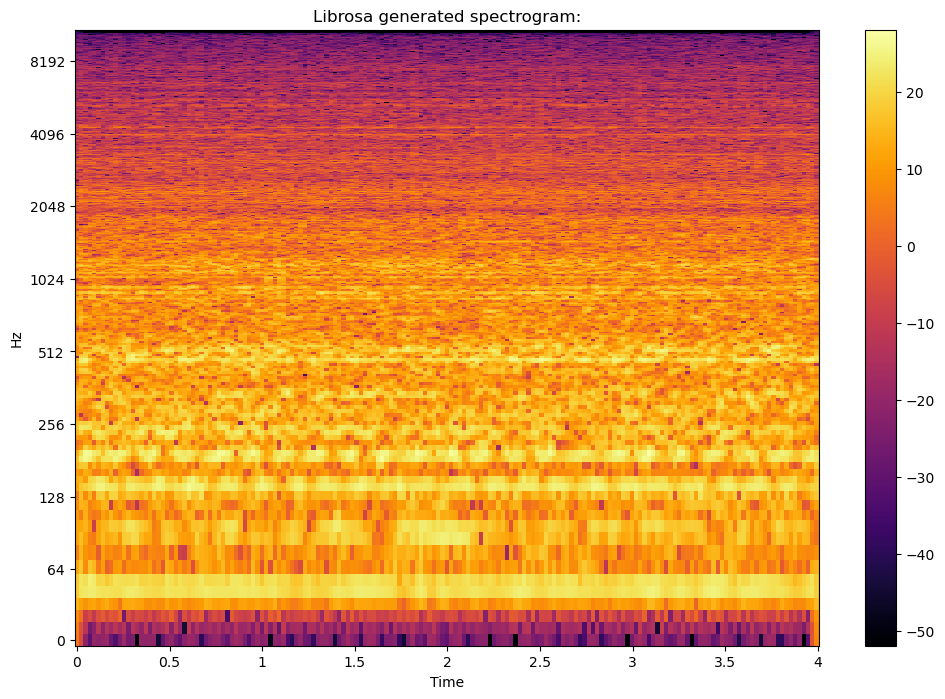

In [110]:
#air_conditioner salience 1

y, sr = librosa.load('Source/UrbanSound8K/audio/fold2/74507-0-0-28.wav')

fig, ax = plt.subplots(figsize = (12,8))
x_stft = librosa.stft(y)
ampl = librosa.amplitude_to_db(abs(x_stft))
img = librosa.display.specshow(ampl, ax=ax,x_axis='time' , y_axis='log', cmap = 'inferno')

ax.set_title('Librosa generated spectrogram:')
plt.colorbar(img)

plt.show()

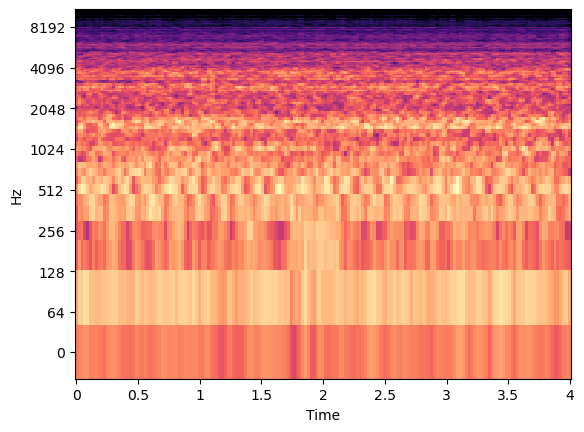

In [111]:
    fig, ax = plt.subplots()
    S = librosa.feature.melspectrogram(y=y, sr=sr,)
    S_db_mel = librosa.amplitude_to_db(S, ref=np.max)
    
    img = librosa.display.specshow(S_db_mel, x_axis='time' , y_axis='log', ax = ax)
    plt.show()

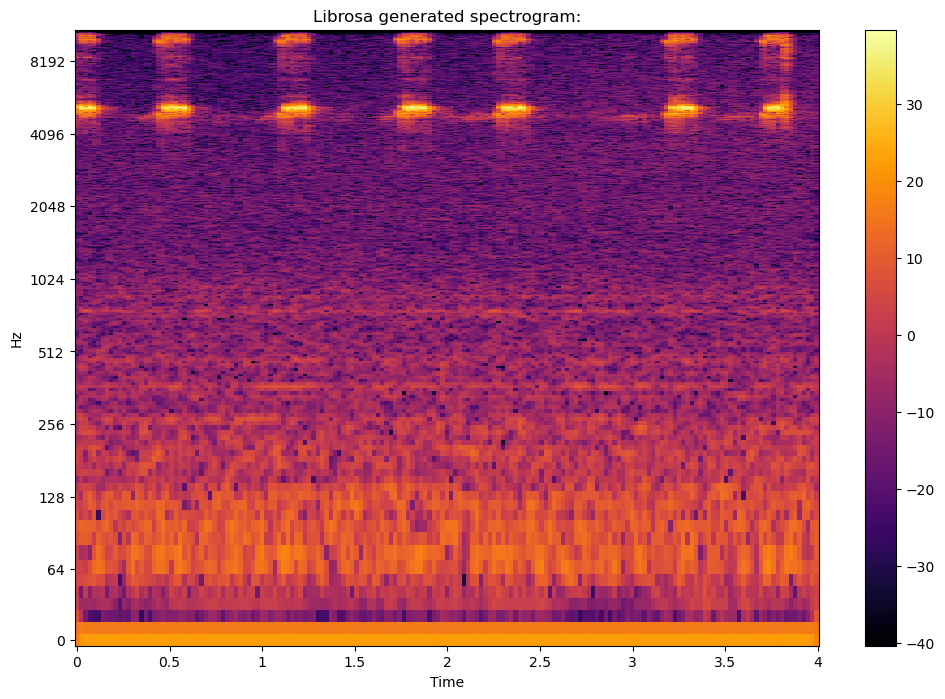

In [116]:
#air_conditioner salience 2

y, sr = librosa.load('Source/UrbanSound8K/audio/fold9/101729-0-0-28.wav')

fig, ax = plt.subplots(figsize = (12,8))
x_stft = librosa.stft(y)
ampl = librosa.amplitude_to_db(abs(x_stft))
img = librosa.display.specshow(ampl, ax=ax,x_axis='time' , y_axis='log', cmap = 'inferno')

ax.set_title('Librosa generated spectrogram:')
plt.colorbar(img)

plt.show()

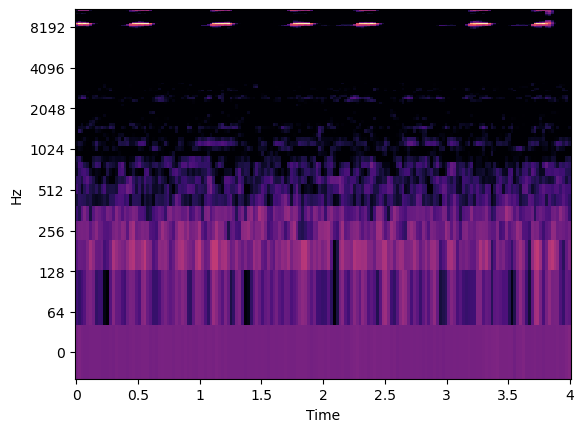

In [109]:
    fig, ax = plt.subplots()
    S = librosa.feature.melspectrogram(y=y, sr=sr,)
    S_db_mel = librosa.amplitude_to_db(S, ref=np.max)
    
    img = librosa.display.specshow(S_db_mel, x_axis='time' , y_axis='log', ax = ax)
    plt.show()

In [128]:
y, sr = librosa.load('Source/UrbanSound8K/audio/fold2/74507-0-0-28.wav')


In [130]:
y.size

88200

In [103]:
noise = norm.rvs(loc = y.mean(), scale = y.std(), size = y.size)


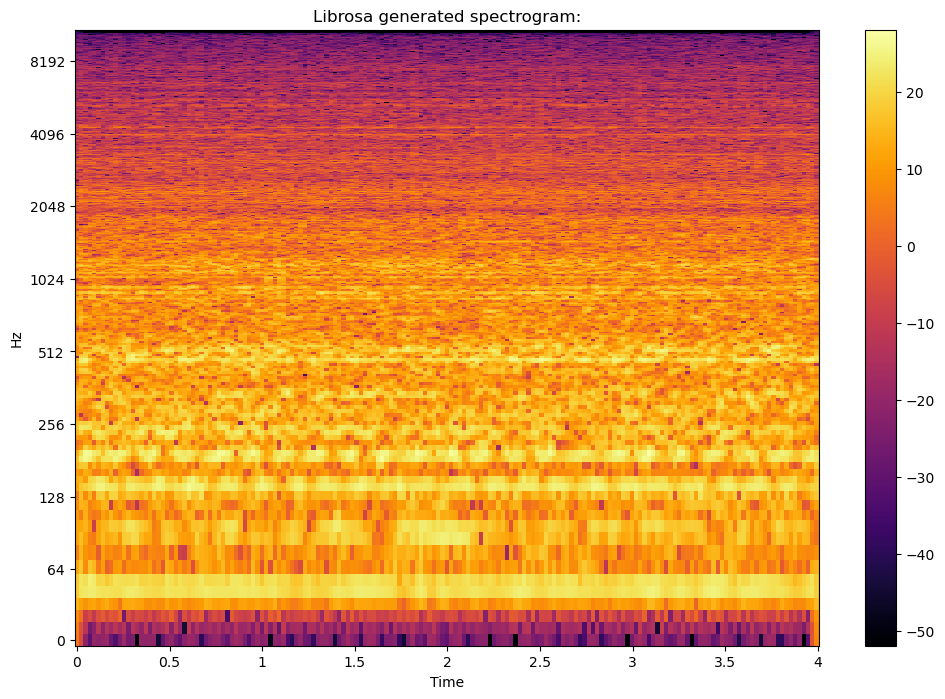

In [114]:
#air_conditioner salience 1

y, sr = librosa.load('Source/UrbanSound8K/audio/fold2/74507-0-0-28.wav')

fig, ax = plt.subplots(figsize = (12,8))
x_stft = librosa.stft(y)
ampl = librosa.amplitude_to_db(abs(x_stft))
img = librosa.display.specshow(ampl, ax=ax,x_axis='time' , y_axis='log', cmap = 'inferno')

ax.set_title('Librosa generated spectrogram:')
plt.colorbar(img)

plt.show()

In [105]:
y_with_noise = y + noise

In [92]:
r.std()

0.06948892180024084

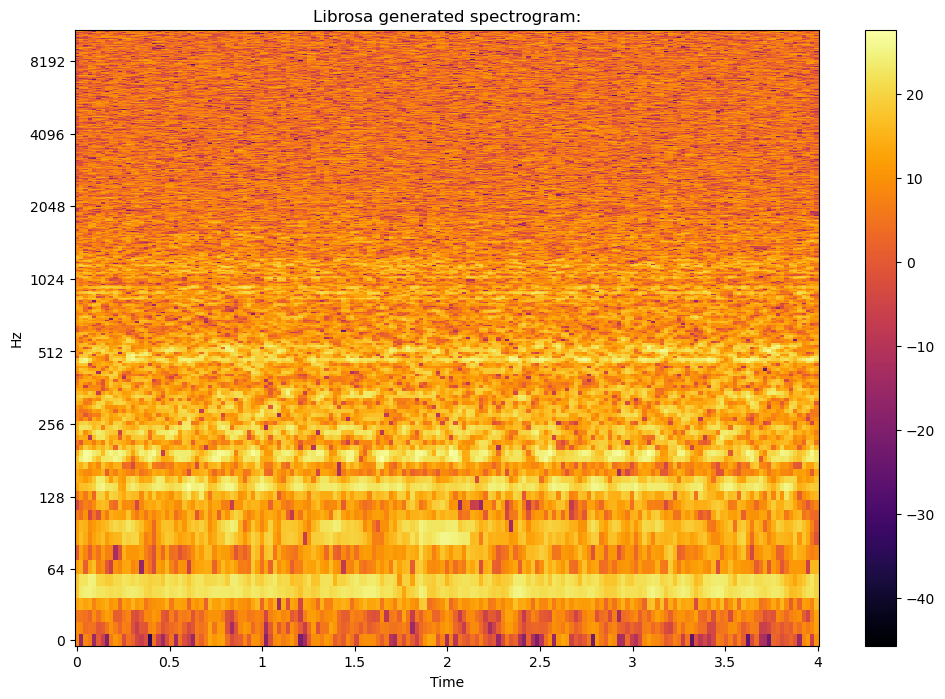

In [115]:
#air_conditioner salience 1

#with noise 

fig, ax = plt.subplots(figsize = (12,8))
x_stft = librosa.stft(y_with_noise)
ampl = librosa.amplitude_to_db(abs(x_stft))
img = librosa.display.specshow(ampl, ax=ax,x_axis='time' , y_axis='log', cmap = 'inferno')

ax.set_title('Librosa generated spectrogram:')
plt.colorbar(img)

plt.show()

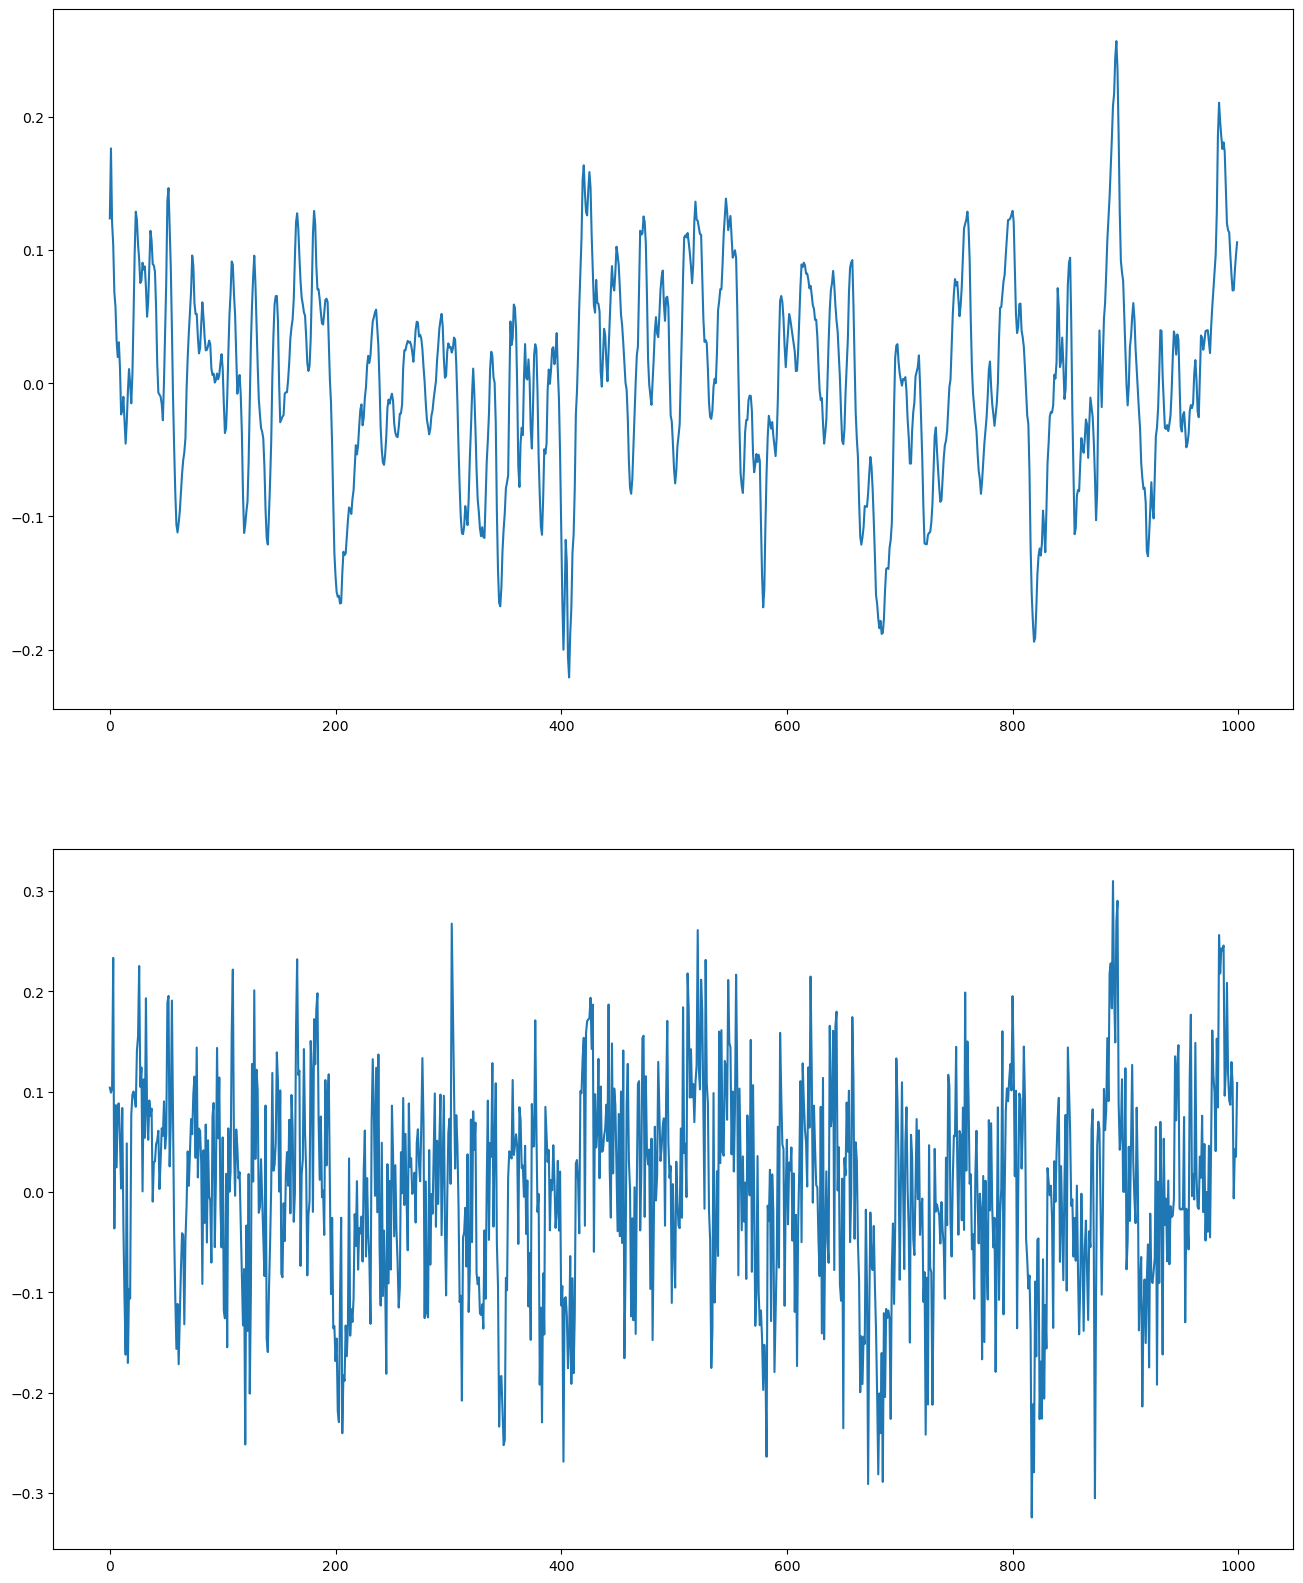

In [112]:
fig, ax = plt.subplots(2,1, figsize = (16,20))

ax[0].plot(y[:1000])
ax[1].plot(y_with_noise[:1000])

plt.show()

In [117]:
train_meta_data, test_meta_data = train_test_split(meta_data, test_size=0.15\
                                                   ,random_state=42, stratify=meta_data['classID'])

In [118]:
# Save train spectograms

for idx, row in train_meta_data.iterrows():
    path = 'Source/UrbanSound8K/audio/fold{}/{}'.format(row['fold'], row['slice_file_name'])
    y, sr = librosa.load(path)
    
    # Standardize the length to 88,200 samples, or 4 seconds
    if y.shape != (88200,):
        y = np.resize(y, 88200)
    
    noise = norm.rvs(loc = y.mean(), scale = y.std(), size = y.size)
    signal_with_noise = y + noise
    
    fig, ax = plt.subplots()
    
    S = librosa.feature.melspectrogram(y=signal_with_noise, sr=sr,)
    S_db_mel = librosa.amplitude_to_db(S, ref=np.max)
    
    img = librosa.display.specshow(S_db_mel, x_axis='time' , y_axis='log', ax = ax)
    plt.axis('off')    
    
    my_path = 'Data/'
    file_name = row['slice_file_name'][:-4]

    training_path = 'train_images_with_noise/{}/'.format(row['classID'])
    
    if not os.path.isdir(my_path + training_path):
        os.makedirs(my_path + training_path)
        
    plt.savefig(my_path + training_path + file_name + '_2')
    
    plt.close()

In [119]:
# Save train spectograms

for idx, row in train_meta_data.iterrows():
    path = 'Source/UrbanSound8K/audio/fold{}/{}'.format(row['fold'], row['slice_file_name'])
    y, sr = librosa.load(path)
    
    # Standardize the length to 88,200 samples, or 4 seconds
    if y.shape != (88200,):
        y = np.resize(y, 88200)
    
    fig, ax = plt.subplots()
    
    S = librosa.feature.melspectrogram(y=y, sr=sr,)
    S_db_mel = librosa.amplitude_to_db(S, ref=np.max)
    
    img = librosa.display.specshow(S_db_mel, x_axis='time' , y_axis='log', ax = ax)
    plt.axis('off')    
    
    my_path = 'Data/'
    file_name = row['slice_file_name'][:-4]

    training_path = 'train_images_with_noise/{}/'.format(row['classID'])
    
    if not os.path.isdir(my_path + training_path):
        os.makedirs(my_path + training_path)
        
    plt.savefig(my_path + training_path + file_name)
    
    plt.close()

In [120]:
# Save train spectograms

for idx, row in test_meta_data.iterrows():
    path = 'Source/UrbanSound8K/audio/fold{}/{}'.format(row['fold'], row['slice_file_name'])
    y, sr = librosa.load(path)
    
    # Standardize the length to 88,200 samples, or 4 seconds
    if y.shape != (88200,):
        y = np.resize(y, 88200)
    
    fig, ax = plt.subplots()
    
    S = librosa.feature.melspectrogram(y=y, sr=sr,)
    S_db_mel = librosa.amplitude_to_db(S, ref=np.max)
    
    img = librosa.display.specshow(S_db_mel, x_axis='time' , y_axis='log', ax = ax)
    plt.axis('off')    
    
    my_path = 'Data/'
    file_name = row['slice_file_name'][:-4]

    testing_path = 'test_images/{}/'.format(row['classID'])
    
    if not os.path.isdir(my_path + testing_path):
        os.makedirs(my_path + testing_path)
        
    plt.savefig(my_path + testing_path + file_name)
    
    plt.close()